In [1]:
import torch
print(torch.__version__)

import numpy as np
import math
import matplotlib.pyplot as plt

2.1.1


### Simple Polynomial Regression using NumPy

Following the [PyTorch beginner tutorial](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html), we will try to fit $y=\sin(x)$ using the 3rd order polynomial $y = a + bx + cx^2 + dx^3$. The network will have 4 parameters (a,b,c,d), and will be trained using gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output. We will implement the network using NumPy before introducing PyTorch. 

**Gradients**: Euclidean distance in 2D can be expressed by $d = \sqrt{\left( x_1 - x_2\right)^2 + \left( y_1 - y_2\right)^2}$, and in n-dimensional space, we generalize this to $d(x,y) = \sqrt{\sum_{i=1}^n \left(x_i - y_i\right)^2}$. As gradients indicate the direction of steepest change, the gradient of a loss function points towards the direction where loss increases most rapidly. To train the model, we must minimize the loss function (so predicted y-values are close to actual y-values), and we use  gradients to find which direction to adjust model parameters ($a,b,c,d$). Defining our loss function as 
$$
\mathcal{L} = \sum_{i=1}^n \left(x_i - y_i\right)^2,
$$
we can take the gradient of the loss function with respect to predicted values $x_i$
$$
\nabla \mathcal{L} = \frac{\partial}{\partial x_i} \sum_{i=1}^n \left(x_i - y_i\right)^2 = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot \frac{\partial}{\partial x_i} \left(x_i - y_i\right) ,
$$
$$
\nabla \mathcal{L} = 2 \sum_{i=1}^n \left(x_i - y_i\right)
$$

**Chain Rule**: To carry out backpropogation is to answer the question: "If I slightly tweak this parameter, how will my error change?" To understand how changing one variable (parameter) affects the outcome of the function (loss), we must apply the chain rule: 
$$
\frac{\partial \mathcal{L}}{\partial x_i} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial x_i}
$$

$$
y_{pred} = a + bx + cx^2 + dx^3 \rightarrow \begin{cases}
\frac{\partial y_{pred}}{\partial a} = 1\\
\frac{\partial y_{pred}}{\partial b} = x \\
\frac{\partial y_{pred}}{\partial c} = x^2 \\
\frac{\partial y_{pred}}{\partial d} = x^3 \\
\end{cases}
$$

We can now calculate gradients for each parameter:

$$
\frac{\partial \mathcal{L}}{\partial a} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial a} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot 1
$$
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial b} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x
$$
$$
\frac{\partial \mathcal{L}}{\partial c} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial c} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x^2
$$
$$
\frac{\partial \mathcal{L}}{\partial d} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial d} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x^3
$$
A positive gradient means that increasing the parameter will increase the loss, and a larger gradient means a change to that parameter will have a larger impact on the loss. We can now update parameters through these gradients and a fixed learning rate (small positive integer), as iteratively calculating gradients at each step allows parameters to "learn" by adjusting themselves to minimize loss. 

Initial parameter values: -0.9487310366846113 0.5407222160441159 -1.0332754754105067 1.068674392168755
0 400989.1159255403
75 732.983124976842
150 600.8611890814861
225 500.84504237377894
300 424.97666510027
375 367.3930094227917
450 323.66285626930227
525 290.4350648694019
600 265.1737544119152
675 245.95880421087148
750 231.33546459333238
825 220.2009163269431
900 211.71864632512518
975 205.25377803191708
1050 200.32419763736712
1125 196.56359496587967
1200 193.69349723729093
1275 191.50209470055103
1350 189.82819905328637
1425 188.54908324654934
1500 187.57125817808623
1575 186.82347296245553
1650 186.2513997257528
1725 185.81359530774773
1800 185.4784314522509
1875 185.22175998167933
1950 185.02513606386802
Result: y = -0.03224203002746427 + 0.8513416353164028x + 0.007008259278637609x^2 + -0.09303853271119711x^3


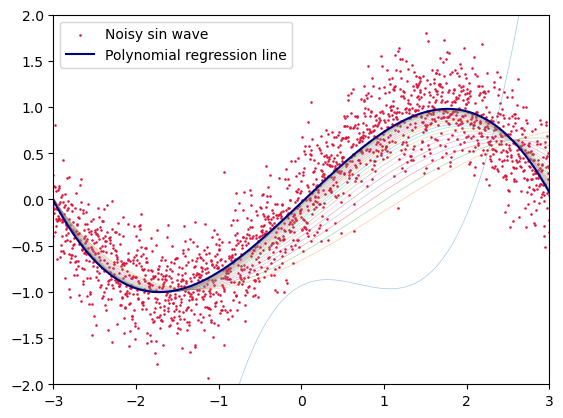

In [65]:
def result(x,a,b,c,d): return a + b * x + c * x ** 2 + d * x ** 3

x = np.linspace(-math.pi, math.pi, 2000)             # Create a noisy sin wave, represented by y
noise = np.random.normal(0, 0.3, len(x))
y = np.sin(x) + noise

a = np.random.randn()                                # Randomly initialize weights                     
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print("Initial parameter values:",a,b,c,d)

learning_rate = 1e-6                                 
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3     # Forward pass: compute predicted y
    
    loss = np.square(y_pred - y).sum()               # Compute and print loss (Euclidean distance)
    if t % 75 == 0:
        print(t, loss)
                                                     
    grad_y_pred = 2 * (y_pred - y)                   # Backpropogation to compute gradients of parameters w/ respect to loss
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a -= learning_rate * grad_a                      # Updating parameters
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
    if t % 75 == 0:
        y_running = result(x,a,b,c,d)
        plt.plot(x,y_running, alpha = 0.4, linewidth=0.5)

print(f'Result: y = {a} + {b}x + {c}x^2 + {d}x^3')    

y_approx = result(x,a,b,c,d)

plt.scatter(x,y, c = "crimson", label = "Noisy sin wave", s = 0.7)
plt.plot(x,y_approx, c = "navy", label = "Polynomial regression line")
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.legend()
plt.show()

Note that by simply removing parameters $c$ and $d$, we can use the same loss function to now perform linear regression. 

Initial parameter values: 0.8037435611859888 -1.2257159612802107
0 40105.06066171878
75 6275.614087172427
150 6243.355922562044
225 6241.855727690137
300 6241.783276328826
375 6241.779777216417
450 6241.779608223211
525 6241.779600061511
600 6241.779599667332
675 6241.779599648295
750 6241.779599647376
825 6241.779599647332
900 6241.779599647329
975 6241.779599647329
1050 6241.77959964733
1125 6241.779599647329
1200 6241.779599647329
1275 6241.77959964733
1350 6241.779599647329
1425 6241.77959964733
1500 6241.77959964733
1575 6241.77959964733
1650 6241.779599647329
1725 6241.779599647329
1800 6241.779599647329
1875 6241.779599647329
1950 6241.779599647329
Result: y = -0.01831980873336159 + 1.9472373570955632x


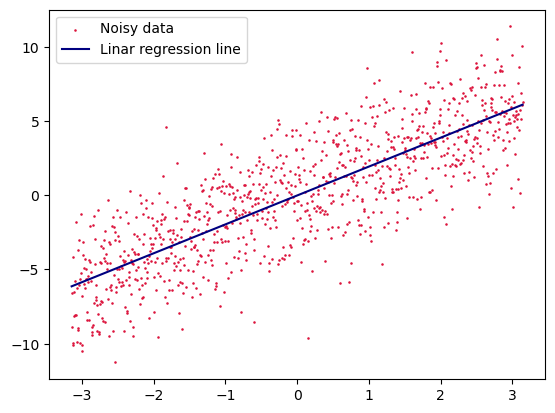

In [59]:
def result(x,a,b): return a + b * x

x = np.linspace(-math.pi, math.pi, 1000)            
noise = np.random.normal(0, 2.5, len(x))
y = 2 * x + noise

a = np.random.randn()                                                
b = np.random.randn()

print("Initial parameter values:",a,b)

learning_rate = 1e-5                                            # Accelerated learning rate                                 
for t in range(2000):
    y_pred = a + b * x                               
    
    loss = np.square(y_pred - y).sum()               
    if t % 75 == 0:
        print(t, loss)
                                                     
    grad_y_pred = 2 * (y_pred - y)                   
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
 
    a -= learning_rate * grad_a                     
    b -= learning_rate * grad_b

print(f'Result: y = {a} + {b}x')    

y_approx = result(x,a,b)

plt.scatter(x,y, c = "crimson", label = "Noisy data", s = 0.7)
plt.plot(x,y_approx, c = "navy", label = "Linar regression line")
plt.legend()
plt.show()

### Introducing PyTorch Tensors

We now replicate the original code, fitting a third-order polynomial to the sine function through PyTorch Tensors. For simplicity, we'll remove numerical noise. 

Initial parameter values: tensor(0.0734) tensor(0.1622) tensor(-0.6719) tensor(-0.5976)
0 117580.640625
75 320.0958251953125
150 237.91835021972656
225 177.49928283691406
300 133.038330078125
375 100.31474304199219
450 76.2258529663086
525 58.48982620239258
600 45.42880630493164
675 35.808467864990234
750 28.721067428588867
825 23.49848747253418
900 19.64917755126953
975 16.811370849609375
1050 14.718755722045898
1125 13.175212860107422
1200 12.036375999450684
1275 11.19592571258545
1350 10.575475692749023
1425 10.117311477661133
1500 9.77889347076416
1575 9.528825759887695
1650 9.343976974487305
1725 9.20729923248291
1800 9.106199264526367
1875 9.031383514404297
1950 8.976009368896484
Result: y = 0.005790506023913622 + 0.8469834923744202x + -0.0009989560348913074x^2 + -0.09194248914718628x^3


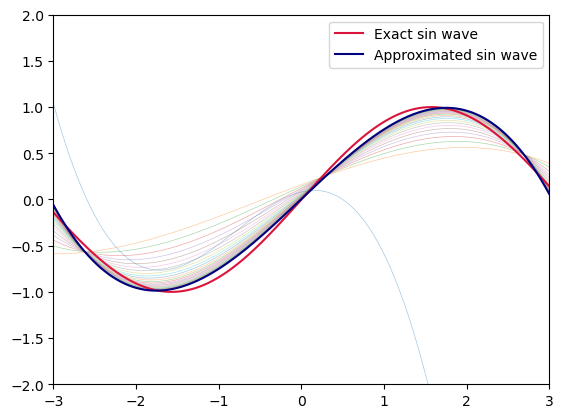

In [57]:
def result(x,a,b,c,d): return a + b * x + c * x ** 2 + d * x ** 3

dtype = torch.float                                             # Each torch.Tensor has a torch.dtype, torch.device, and torch.layout
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, dtype = dtype, device = device)
y = torch.sin(x)

a = torch.randn((), dtype = dtype, device = device)
b = torch.randn((), dtype = dtype, device = device)
c = torch.randn((), dtype = dtype, device = device)
d = torch.randn((), dtype = dtype, device = device)

print("Initial parameter values:",a,b,c,d)

learning_rate = 1e-6                   
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3                 # Forward pass
    
    loss = (y_pred - y).pow(2).sum().item()                      # .item() converts PyTorch tensor to Python number
    if t % 75 == 0:
        print(t, loss)
                                                     
    grad_y_pred = 2 * (y_pred - y)                               # Backpropogation                
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a -= learning_rate * grad_a                                  # Updating weights through gradient descent          
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
    if t % 75 == 0:
        y_running = result(x,a,b,c,d)
        plt.plot(x,y_running, alpha = 0.4, linewidth=0.5)

print(f'Result: y = {a} + {b}x + {c}x^2 + {d}x^3')    

y_approx = result(x,a,b,c,d)

plt.plot(x,y, c = "crimson", label = "Exact sin wave")
plt.plot(x,y_approx, c = "navy", label = "Approximated sin wave")
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.legend()
plt.show()